## Cononical First and Second Order (DT) Systems

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# First Order Cononical Systems

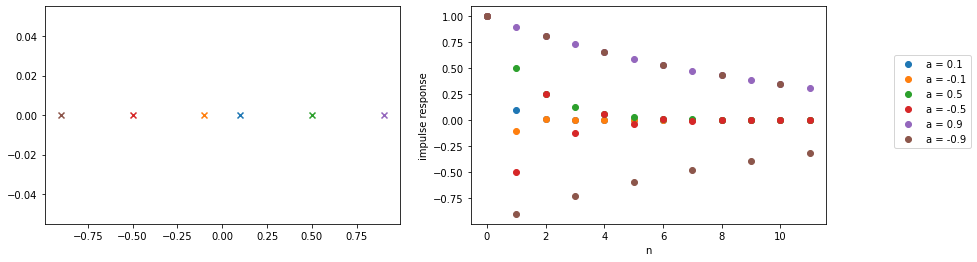

In [37]:
a_vals = np.asarray([0.1, -0.1, 0.5, -0.5, 0.9, -0.9])
a_max = np.max(np.abs(a_vals))
n = np.arange(0, 10 / a_max)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
for i, a in enumerate(a_vals):
    ax[0].scatter([a], [0], marker='x', label=f'a = {a}')
    ax[0].grid(linestyle=':')
    # ax[0].set_xlim([-1, 0])
    # ax[0].legend()

    ax[1].scatter(n, a ** n, label=f'a = {a}')
    ax[1].set_xlabel('n')
    ax[1].set_ylabel('impulse response')
    ax[1].grid(linestyle=':')
    ax[1].legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)

# Second Order Cononical Systems

In [40]:
def impulse_response_2nd(rho, nu_0, n):
    assert nu_0 >= 0, f'nu_0 should be non-negative, you passed nu_0 = {nu_0}'
    nu_0 = nu_0 % 1
    if nu_0 == 0:
        return  (n + 1) * rho ** n
    elif nu_0 == 0.5:
        return  (n + 1) * (-rho) ** n
    else:
        return (rho ** n) * (np.sin(2 * np.pi * nu_0 * (n + 1))) / np.sin(2 * np.pi * nu_0)

Hard to do multiple stem plots on one plot.  See Fig. 6.29 in the text for these impulse response plots and 6.30 for the step response plots.

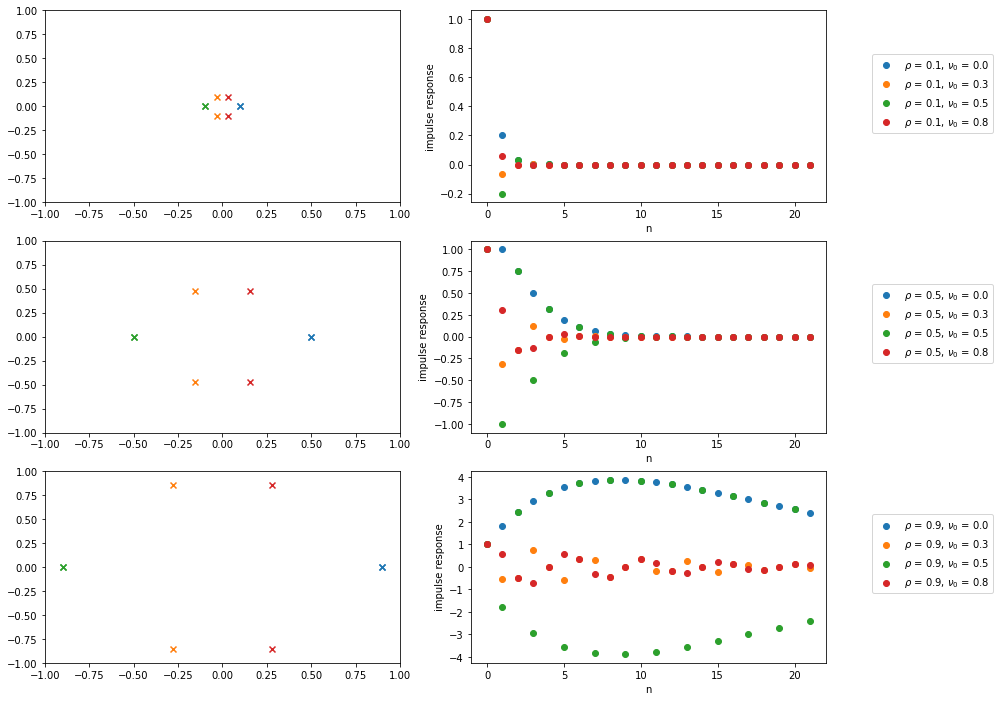

In [44]:
rhos = np.asarray([0.1, 0.5, 0.9])
nu_0s = np.asarray([0, 0.3, 0.5, 0.8])
# rhos = np.asarray([1,1])
# nu_0s = np.asarray([0.2])

max_rho = np.max(rhos)

n = np.arange(0, int(20 / max_rho))

N_rows = len(rhos)
fig, ax = plt.subplots(N_rows, 2, figsize=(14, 4 * N_rows))

for k, rho in enumerate(rhos):
    for i, nu_0 in enumerate(nu_0s):
        p_plus = rho * np.exp(2j * np.pi * nu_0)
        p_minus = np.conj(p_plus)   
        
        ax[k][0].scatter([p_plus.real, p_minus.real], [p_plus.imag, p_minus.imag], marker='x', label=fr'$\rho$ = {rho}, $\nu_0$ = {nu_0}')
        ax[k][0].grid(linestyle=':')
        ax[k][0].set_xlim([-1,+1])
        ax[k][0].set_ylim([-1,+1])
        
        ax[k][1].scatter(n, impulse_response_2nd(rho, nu_0, n), label=fr'$\rho$ = {rho}, $\nu_0$ = {nu_0}')
        ax[k][1].set_xlabel('n')
        ax[k][1].set_ylabel('impulse response')
        ax[k][1].grid(linestyle=':')
        ax[k][1].legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)

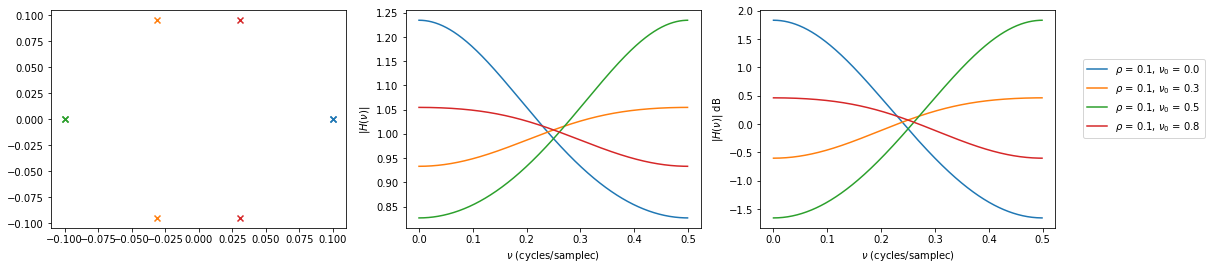

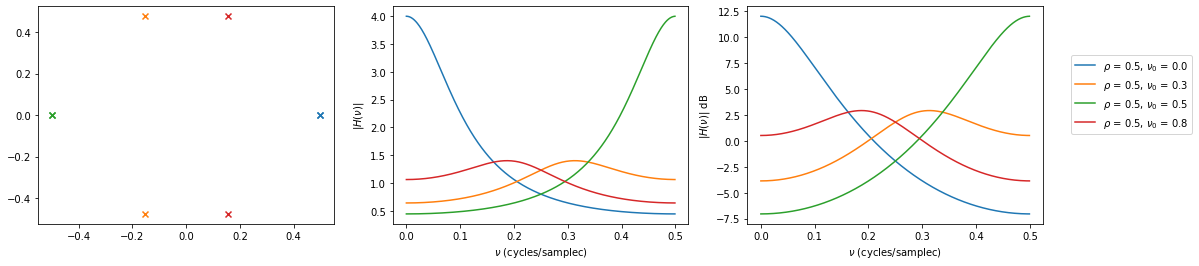

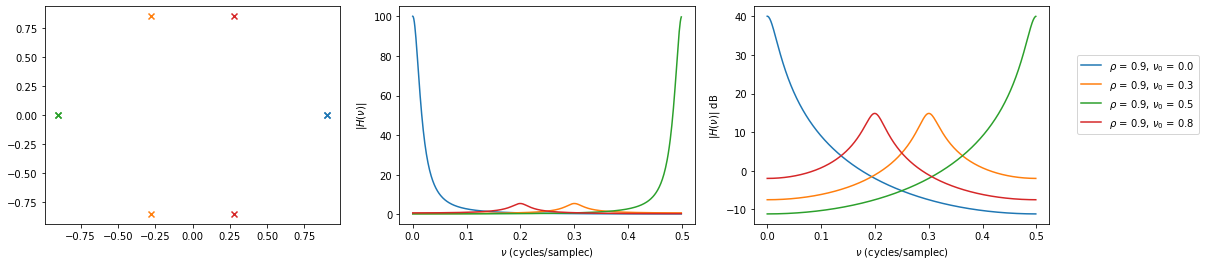

In [54]:
import scipy.signal as signal

rhos = np.asarray([0.1, 0.5, 0.9])
nu_0s = np.asarray([0, 0.3, 0.5, 0.8])

b = [1]

for k, rho in enumerate(rhos):
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    for i, nu_0 in enumerate(nu_0s):

        p_plus = rho * np.exp(2j * np.pi * nu_0)
        p_minus = np.conj(p_plus)   
        
        ax[0].scatter([p_plus.real, p_minus.real], [p_plus.imag, p_minus.imag], marker='x', label=fr'$\rho$ = {rho}, $\nu_0$ = {nu_0}')
        ax[0].grid(linestyle=':')
        ax[0].set_xlim([-1,+1])
        ax[0].set_ylim([-1,+1])

        a = [1, -2 * rho * np.cos( 2 * np.pi * nu_0), rho **2]
        Omega, H = signal.freqz(b,a)
        nu = Omega / (2 * np.pi)
        mag_H = np.abs(H)

        ax[1].plot(nu, mag_H, label=fr'$\rho$ = {rho}, $\nu_0$ = {nu_0}')
        ax[1].set_xlabel(r'$\nu$ (cycles/samplec)')
        ax[1].set_ylabel(r'$|H(\nu)|$')
        ax[1].grid(linestyle=':')
        # ax[1].set_xlim([0.5, 2])
        # ax[1].legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)

        ax[2].plot(nu, 20 * np.log10(mag_H), label=fr'$\rho$ = {rho}, $\nu_0$ = {nu_0}')
        ax[2].set_xlabel(r'$\nu$ (cycles/samplec)')
        ax[2].set_ylabel(r'$|H(\nu)|$ dB')
        ax[2].grid(linestyle=':')
        ax[2].legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)